In [21]:
from ml_aos.lightning import WaveNet
from ml_aos.dataloader import Donuts
import matplotlib.pyplot as plt

In [60]:
model=WaveNet.load_from_checkpoint('/astro/users/driemann/ml-aos/lightning_logs/version_1/checkpoints/epoch=96-step=14647.ckpt')

In [22]:
model1=WaveNet.load_from_checkpoint('/astro/users/driemann/ml-aos/lightning_logs/version_2/checkpoints/epoch=99-step=10900.ckpt')
model1.eval()

WaveNet(
  (donut_net): DonutNet(
    (layers): ModuleList(
      (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): DownBlock(
        (layers): ModuleList(
          (0): SkipBlock(
            (layers): Sequential(
              (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=same)
              (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): ReLU(inplace=True)
            )
          )
          (1): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (3): ReLU(inplace=True)
        )
      )
      (4): DownBlock(
        (layers): ModuleList(
          (0): SkipBlock(
            (layers): Sequential(
              (0): Conv2d(16, 16, kernel_size=(3, 3

In [23]:
train=Donuts()
train[0]
dof_pred=model1(train[0]['image'][None, ...], train[0]['intrafocal'][None, ...])

In [24]:
train[0]['image'][None, ...]

tensor([[[[ 3.1343, -0.4639,  7.1462,  ..., -1.2720,  5.2129,  4.8777],
          [-1.0280, -1.5170,  4.5381,  ...,  1.7232, -0.3992, -5.3657],
          [ 0.9368, -5.4128,  3.1722,  ..., -1.1409,  1.7306,  0.1782],
          ...,
          [ 5.2713, -3.5611,  7.1056,  ..., -0.6212,  2.3375, -3.6508],
          [-2.4617, -4.7262,  6.5995,  ..., -3.3175, -1.8732,  4.0078],
          [-6.6586,  3.3981, -7.3676,  ...,  1.8326,  4.3297, -3.6872]]]])

In [13]:
train[0]['intrafocal'][None, ...].shape

torch.Size([1, 1])

In [14]:
test=Donuts('test')

In [15]:
train[0]

{'image': tensor([[[ 3.1343, -0.4639,  7.1462,  ..., -1.2720,  5.2129,  4.8777],
          [-1.0280, -1.5170,  4.5381,  ...,  1.7232, -0.3992, -5.3657],
          [ 0.9368, -5.4128,  3.1722,  ..., -1.1409,  1.7306,  0.1782],
          ...,
          [ 5.2713, -3.5611,  7.1056,  ..., -0.6212,  2.3375, -3.6508],
          [-2.4617, -4.7262,  6.5995,  ..., -3.3175, -1.8732,  4.0078],
          [-6.6586,  3.3981, -7.3676,  ...,  1.8326,  4.3297, -3.6872]]]),
 'intrafocal': tensor([1.]),
 'dof': tensor([ 0.0003, -0.0008,  0.0005,  0.0004, -0.0008])}

In [16]:
train[0]['intrafocal'][None, ...]train[0]['intrafocal'][None, ...]

SyntaxError: invalid syntax (1409202001.py, line 1)

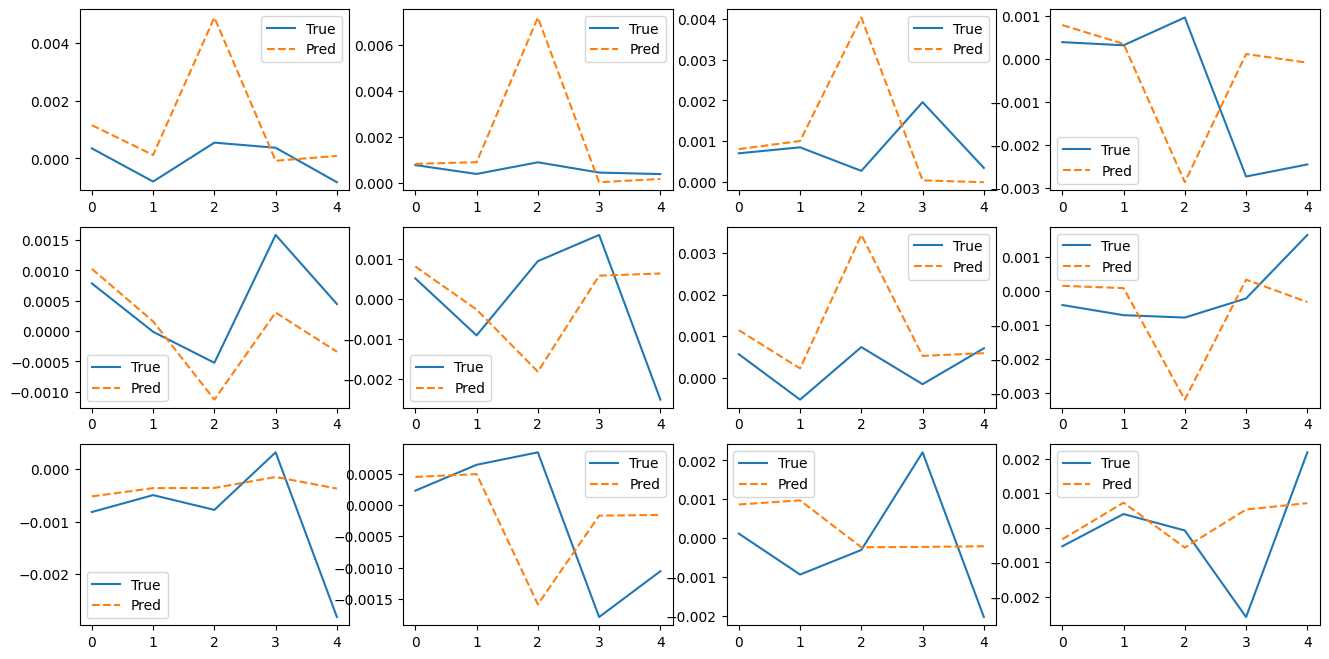

In [25]:
fig, axes = plt.subplots(3, 4, figsize=(16, 8))
for i,ax in enumerate(axes.flatten()):
    ax.plot(train[i]['dof'], label="True")
    dof_pred=model1(train[i]['image'][None, ...], train[i]['intrafocal'][None, ...])
    ax.plot(dof_pred.detach().numpy().flatten(), ls='--', label='Pred')
    ax.legend()
    #ax.set(ylim=(-1E-3, +1E-3))
    
    
#axes.plot(train[0]['dof'], label="True")
#axes.plot(opd_pred.detach().numpy().flatten(), ls="--", label="Pred")
#axes.legend()

In [ ]:
losses = []
for i in range(10_000):
    data, truth = ...[i]
    pred = model1(data)
    losses.append(np.mean((pred-truth)**2))

losses = np.array(losses)


idx = sorted_indices


In [39]:
axes.flatten()

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
      dtype=object)

array([-6.5651350e-04,  1.2763143e-03, -1.5543327e-03,  1.0001717e+00,
        7.0376322e-04, -2.7675927e-04, -1.1626557e-03,  9.9913812e-01,
        5.6175888e-04,  6.5888092e-04,  2.6574358e-04,  9.9930656e-01],
      dtype=float32)

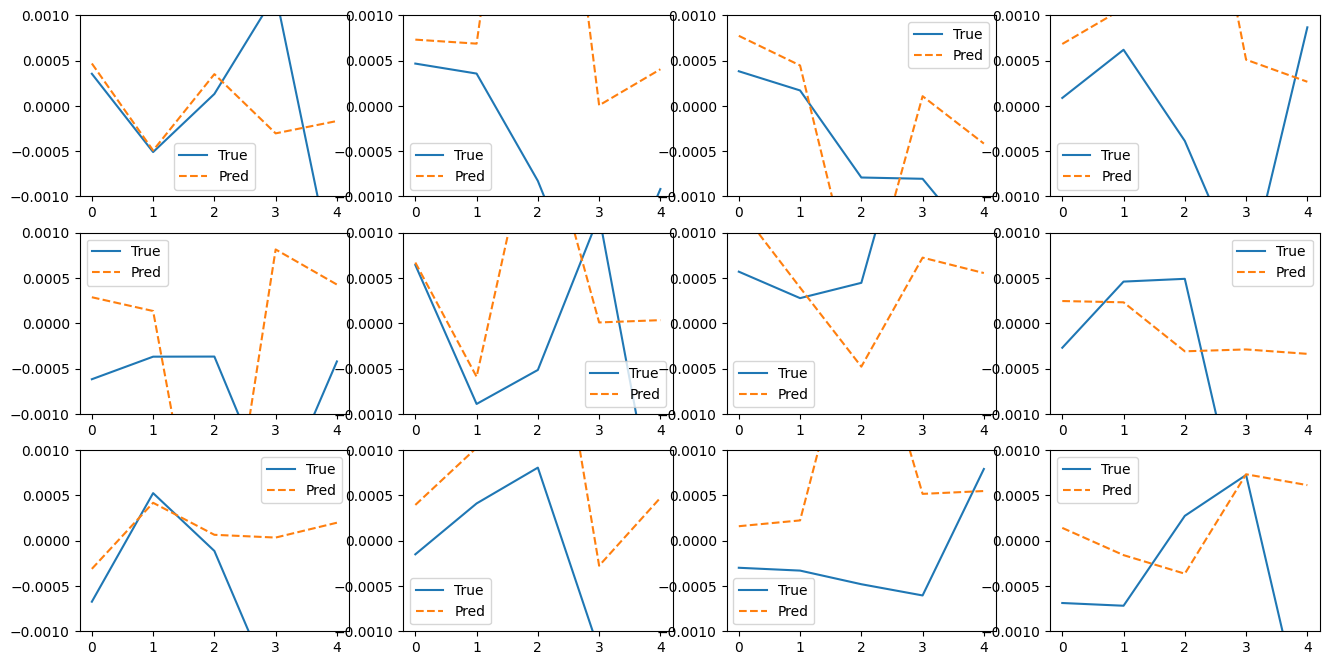

In [20]:
fig, axes = plt.subplots(3, 4, figsize=(16, 8))
for i,ax in enumerate(axes.flatten()):
    ax.plot(test[i]['dof'], label="True")
    dof_pred=model1(test[i]['image'][None, ...], test[i]['intrafocal'][None, ...])
    ax.plot(dof_pred.detach().numpy().flatten(), ls='--', label='Pred')
    ax.legend()
    ax.set(ylim=(-1E-3, +1E-3))
    